<a href="https://colab.research.google.com/github/Ozziekins/ColabWorks/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2:

In this assignment, you are going to solve three problems: 

1. Improving Nearest Neighbors Retrieval Speed (8 points)
2. Gaussian Naive Bayes (4 points)
3. PCA (3 points)

## 1. Improving Nearest Neighbors Retrieval Speed (8 points)

You are given a dataset of coordinates and information about places around the globe. Explore the dataset. You will be mostly working with 2d vectors which represent longitude and latitude.

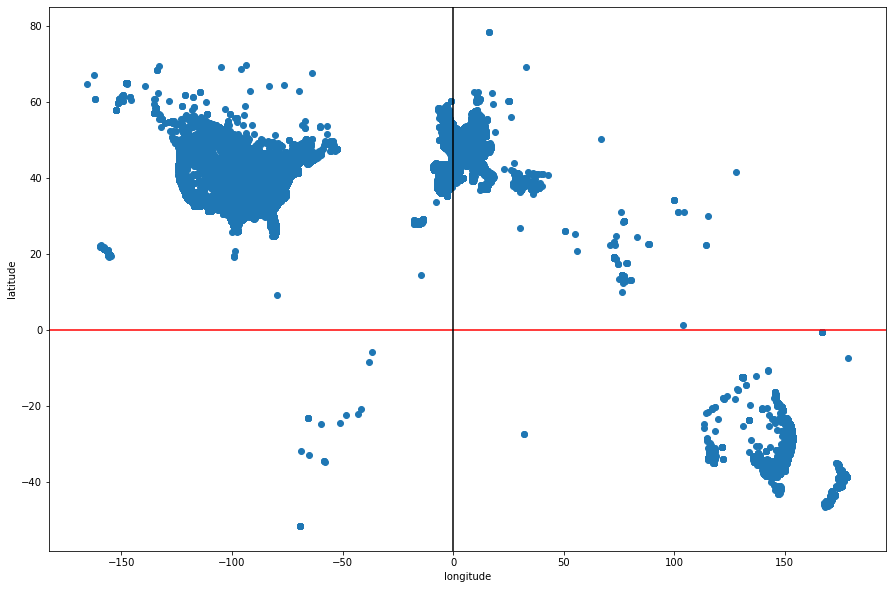

In [ ]:
import pickle
import matplotlib.pyplot as plt

with open("poi_sample001.pickle", "rb") as f:
    dataset = pickle.load(f)
    
X = [v[0][0] for v in dataset]
Y = [v[0][1] for v in dataset]

plt.figure(figsize=(15, 10))
a = plt.axes()
a.set_xlabel('longitude')
a.set_ylabel('latitude')
plt.axhline(0, color='red')
plt.axvline(0, color='black')
plt.scatter(X, Y)
plt.show()

### 1.1 Simple NN Search

Implement the simplest form of NN search (exhaustive search).
Your function should: 
1. Calculate the distance between the test point and each dataset point using euclidean distance.
2. Sort the dataset according to calculated distance in ascending order.
3. Return the top K points from the sorted dataset.

You need to implement this from scratch. Don't use library solutions. 
It is okay to use library function for eucliden distance.

In [ ]:
def simple_nns(v, data, k):
    """
    param: v: test point
    param: data: dataset
    param: k: number of nearest neighbors to retrive
    return: list of nearest points from the dataset
    """
    # implement simple NN Search
    
    return []

Find the first 100 nearest neighbors of Paris. However, we are only interested in shops. Filter out everything that doesn't contain 'Shop' substring in the description and plot the remaining points.

In [ ]:
paris = [2.334083, 48.853260]

# find and plot the nearest neighbors according to the above instructions
paris_nn = None


# axes limits are set for better visualization, don't change them
plt.ylim(48.5, 49)
plt.xlim(2,3)
plt.show()

Measure retrieval time of `simple_nns` for every given number of nearest neighbors. Every time select some random point from the dataset. Plot the results.

In [ ]:
# numbers of nearest neghbors to retrieve
nns = [10, 100, 1000, 10000, 20000, 40000]

# measure retrival time for every value above and save it somewhere 


# plot the results



What do you observe? Do you see any trends, how can you explain them?

<span style="color:blue"> Your answer: </span>

### 1.2 Improving NNS

Choose any method you like to speed up NN search, understand it thoroughly and learn how to apply it. Explain the way it works in few sentences and in your own words.

<span style="color:blue"> Your answer: </span>

Apply the chosen method on the geographic dataset. Similarly to the above, find the nearest neighbors and plot retrieval times.

In [ ]:
# apply the chosen method




Find the first 100 nearest neighbors of Paris. However, we are only interested in shops. Filter out everything that doesn't contain 'Shop' substring in the description and plot the remaining points.

In [ ]:
paris = [2.334083, 48.853260]

# find and plot the nearest neighbors according to the above instructions
paris_nn = None


# axes limits are set for better visualization, don't change them
plt.ylim(48.5, 49)
plt.xlim(2,3)
plt.show()

Measure retrieval time of `simple_nns` for every given number of nearest neighbors. Every time select some random point from the dataset. Plot the results.

In [ ]:
# numbers of nearest neghbors to retrieve
nns = [10, 100, 1000, 10000, 20000, 40000]

# measure retrival time for every value above and save it somewhere 


# plot the results



What do you observe? Do you see any trends, how can you explain them?

<span style="color:blue"> Your answer: </span>

### 1.3 Comparison

Plot retrieval times together in the same plot. If time difference is big (as it should be), use a logarithmic scale for better visualization. If you don't achieve any time improvements, then you are doing something wrong.

In [ ]:
# plot retrieval times together



Analyze the results and summarise them here. 

<span style="color:blue"> Your answer: </span>

## 2. Gaussian Naive Bayes (4 points)

Finish the implementation of Gaussian NB.

In [ ]:
import collections
import numpy as np
import math
from scipy.stats import norm

class GaussianNB:
    def priors(self, y):
        temp_dict = collections.Counter(y)
        prior_probs = np.ones(len(np.unique(y)))
        for i in range(len(np.unique(y))):
            prior_probs[i] = temp_dict[i]/y.shape[0]
        return prior_probs

    def fit(self, X_train, y_train):
        """
        fit classifier, i.e. calculate needed statistics
        """
        ### START CODE HERE ###
        
        self.prior = self.priors(y_train)
        self.means, self.std = self.mean_std(X_train, y_train)
        
        ### END CODE HERE ###

    def mean_std(self, X, y):
        self.y = y
        means = []
        stds = []
        for i in np.unique(y):
            points = X[y == i]
            means.append(points.mean(axis=0))
            stds.append(points.std(axis=0))
        return means, stds


    def prob_feature_class(self, mean, std, x):
        return 1/(np.sqrt(2*(np.pi)*std)) * np.exp((-(x-mean)**2)/(2*std))
        # return (1 / (std * ((2 * math.pi) ** 0.5) )) * math.exp(- 0.5 * (((x - mean) / std) ** 2))

    def predict(self, X_test):
        """
        predict class labels for test data points
        param: test_data: list of data points to be classified
        return: predictions (class labels)
        """
        ### START CODE HERE ###
        predictions = []
        pre_probab = self.prior
        temp_prob = 0
        for i in range(len(X_test)):
            total_prob = []
            for j in range(len(np.unique(self.y))):
                temp_prob = np.log(pre_probab[j])
                for n in range(len(X_test[i])):
                    temp_prob = temp_prob + np.log(self.prob_feature_class(self.means[j][n], self.std[j][n], X_test[i][n]))
                total_prob.append(temp_prob)
            total_prob = np.asarray(total_prob)
            predictions.append(np.unique(self.y)[total_prob.argmax()])
        
        ### END CODE HERE ###
        return predictions



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)


# You should get the accuracy score not less than 90%.
print(accuracy_score(y_test, y_pred))

0.9666666666666667


## 3. PCA

Apply PCA to the Digits dataset, produce the scree plot for the given data and decide the optimal number of PCs to keep. Calculate and print their total explained variance.

In [ ]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)

# apply PCA


# make scree plot


# choose the number PCs and calculate and print their total explained variance



Thoroughly justify your choice - this is the main part of the work for this task.

<span style="color:blue"> Your answer: </span>